## Dendritic thin spine analysis for neuronstudio outputs

Code for analyzing and plotting the thin dendritic spine head diameter of thin spines.  This code assumes the raw output from NeuronStudio has been combined using the 'Compile Dendrite Spine Files' notebook included in this repository.

#Modified by Sean Trettel (github.com/trettels) from code by Tina Gruene (github.com/TinaGruene/spine-analysis)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances #needed for nearest neighbor/min distances analyis
from sklearn.cluster import DBSCAN #for clustering analysis
from scipy import stats
%matplotlib inline

In [22]:
CStress = pd.read_csv('./JordanData/DATA/CStress.csv')
CStress[CStress.X == '-1.#IND00'] = float('nan')
CStress[CStress.Y == '-1.#IND00'] = float('nan')
CStress[CStress.Z == '-1.#IND00'] = float('nan')
PStress = pd.read_csv('./JordanData/DATA/PStress.csv')
PStress[PStress.X == '-1.#IND00'] = float('nan')
PStress[PStress.Y == '-1.#IND00'] = float('nan')
PStress[PStress.Z == '-1.#IND00'] = float('nan')
UStress = pd.read_csv('./JordanData/DATA/UStress.csv')
UStress[UStress.X == '-1.#IND00'] = float('nan')
UStress[UStress.Y == '-1.#IND00'] = float('nan')
UStress[UStress.Z == '-1.#IND00'] = float('nan')

## Head diameter analysis

Example will show thin spine head diameter analysis only, but can be performed on mushroom spines and thin+mushroom spines as well.

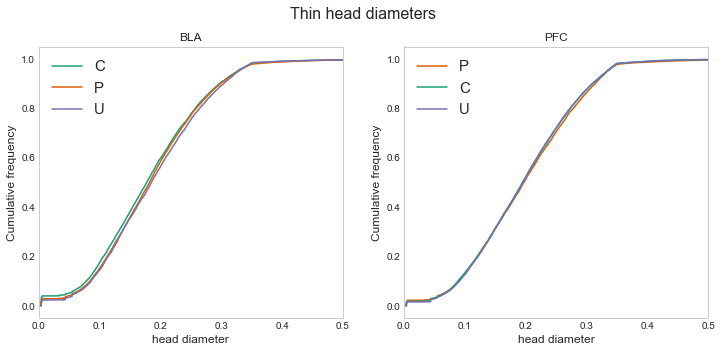

In [3]:
#plot cumulative distribution for thin spine head diameters 
sns.set_style('whitegrid',{'axes.grid' : False}) #changes default styles
C_color = (27/255,158/255,119/255) #RGB colors
P_color = (217/255,95/255,2/255)
U_color = (117/255,112/255,179/255)

CStress_thin = CStress[CStress.TYPE == 'thin'] #use only thin spines in the BLA
PStress_thin = PStress[PStress.TYPE == 'thin']
UStress_thin = UStress[UStress.TYPE == 'thin']
CStress_thin_BLA = CStress_thin[CStress_thin.region == 'BLA'] #use only thin spines in the BLA
PStress_thin_BLA = PStress_thin[PStress_thin.region == 'BLA']
UStress_thin_BLA = UStress_thin[UStress_thin.region == 'BLA']
CStress_thin_PFC = CStress_thin[CStress_thin.region == 'PFC'] #use only thin spines in the PFC
PStress_thin_PFC = PStress_thin[PStress_thin.region == 'PFC']
UStress_thin_PFC = UStress_thin[UStress_thin.region == 'PFC']

#BLA
x_CSB = np.sort(CStress_thin_BLA['head_diameter'])  #sets up values to be plotted 
y_CSB = np.arange(1, len(x_CSB)+1) / len(x_CSB)

x_PSB = np.sort(PStress_thin_BLA['head_diameter'])
y_PSB = np.arange(1, len(x_PSB)+1) / len(x_PSB)

x_USB = np.sort(UStress_thin_BLA['head_diameter'])
y_USB = np.arange(1, len(x_USB)+1) / len(x_USB)

# PFC
x_CSP = np.sort(CStress_thin_PFC['head_diameter'])  #sets up values to be plotted 
y_CSP = np.arange(1, len(x_CSP)+1) / len(x_CSP)

x_PSP = np.sort(PStress_thin_PFC['head_diameter'])
y_PSP = np.arange(1, len(x_PSP)+1) / len(x_PSP)

x_USP = np.sort(UStress_thin_PFC['head_diameter'])
y_USP = np.arange(1, len(x_USP)+1) / len(x_USP)

fig = plt.figure(figsize=(12,5)) #set up figure instance and define figure size

fig.suptitle('Thin head diameters',fontsize=16,y=0.99)
ax2 = fig.add_subplot(1,2,1)
ax2.plot(x_CSB, y_CSB, c = C_color, label='C')
ax2.plot(x_PSB, y_PSB, c = P_color, label='P')
ax2.plot(x_USB, y_USB, c = U_color, label='U')
ax2.set_xlabel('head diameter', fontsize=12)
ax2.set_ylabel('Cumulative frequency',fontsize=12)
ax2.set_xlim([0,0.5])
ax2.set_title('BLA')
ax2.legend(fontsize=15)

ax3 = fig.add_subplot(1,2,2, sharex=ax2)
ax3.plot(x_CSP, y_CSP, c = P_color, label='P')
ax3.plot(x_PSP, y_PSP, c = C_color, label='C')
ax3.plot(x_USP, y_USP, c = U_color, label='U')
ax3.set_xlim([0,0.5])
ax3.set_xlabel('head diameter',fontsize=12)
ax3.set_ylabel('Cumulative frequency',fontsize=12)
ax3.set_title('PFC')
ax3.legend(fontsize=15)
#ax3.set_title('Unlabeled, KS-test p=0.726')



plt.savefig('ThinSpine_HD_BLA_and_PFC.tiff',dpi=300)
plt.savefig('ThinSpine_HD_BLA_and_PFC.eps')
plt.show()



In [4]:
print('BLA thin-spine head diameter, (C vs. P): ', stats.ks_2samp(CStress_thin_BLA['head_diameter'], PStress_thin_BLA['head_diameter']))
print('BLA thin-spine head diameter, (C vs. U): ', stats.ks_2samp(CStress_thin_BLA['head_diameter'], UStress_thin_BLA['head_diameter']))
print('BLA thin-spine head diameter, (P vs. U): ', stats.ks_2samp(PStress_thin_BLA['head_diameter'], UStress_thin_BLA['head_diameter']))
print('')
print('PFC thin-spine head diameter, (C vs. P): ', stats.ks_2samp(CStress_thin_PFC['head_diameter'], PStress_thin_PFC['head_diameter']))
print('PFC thin-spine head diameter, (C vs. U): ', stats.ks_2samp(CStress_thin_PFC['head_diameter'], UStress_thin_PFC['head_diameter']))
print('PFC thin-spine head diameter, (P vs. U): ', stats.ks_2samp(PStress_thin_PFC['head_diameter'], UStress_thin_PFC['head_diameter']))

BLA thin-spine head diameter, (C vs. P):  Ks_2sampResult(statistic=0.025752267454129923, pvalue=0.0006915035797234474)
BLA thin-spine head diameter, (C vs. U):  Ks_2sampResult(statistic=0.036938144534177986, pvalue=0.00015270267874560733)
BLA thin-spine head diameter, (P vs. U):  Ks_2sampResult(statistic=0.023513315372044152, pvalue=0.014726677116835589)

PFC thin-spine head diameter, (C vs. P):  Ks_2sampResult(statistic=0.01768234537729374, pvalue=0.11795048592775899)
PFC thin-spine head diameter, (C vs. U):  Ks_2sampResult(statistic=0.01994248332009485, pvalue=0.027988949528874117)
PFC thin-spine head diameter, (P vs. U):  Ks_2sampResult(statistic=0.008229431895606973, pvalue=0.8675620504218451)


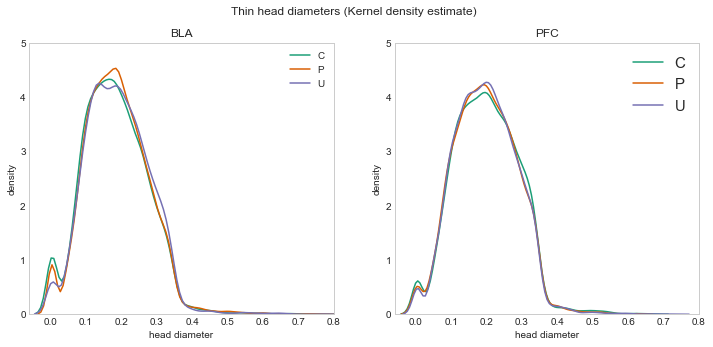

In [21]:
# a different way to look at differences in distribution is a kernel density estimate plot. 

fig = plt.figure(figsize=(12,5))
fig.suptitle('Thin head diameters (Kernel density estimate)')
ax1 = fig.add_subplot(1,2,1)
sns.distplot(CStress_thin_BLA['head_diameter'],hist=False,kde=True,color=C_color,label='C',ax=ax1)
sns.distplot(PStress_thin_BLA['head_diameter'],hist=False,kde=True,color=P_color,label='P',ax=ax1)
sns.distplot(UStress_thin_BLA['head_diameter'],hist=False,kde=True,color=U_color,label='U',ax=ax1)
ax1.set_xlim([-0.06,0.8])
ax1.set_ylim([0,5])
ax1.set_title('BLA')
ax1.set_xlabel('head diameter')
ax1.set_ylabel('density')

ax2 = fig.add_subplot(1,2,2)
sns.distplot(CStress_thin_PFC['head_diameter'],hist=False,kde=True,color=C_color,label='C',ax=ax2)
sns.distplot(PStress_thin_PFC['head_diameter'],hist=False,kde=True,color=P_color,label='P',ax=ax2)
sns.distplot(UStress_thin_PFC['head_diameter'],hist=False,kde=True,color=U_color,label='U',ax=ax2)
ax2.set_xlim([-0.06,0.8])
ax2.set_ylim([0,5])
ax2.set_title('PFC')
ax2.set_xlabel('head diameter')
ax2.set_ylabel('density')

plt.legend(fontsize=15)



plt.savefig('KDE_BLA_and_PFC_thin_hd.tiff',dpi=300)
plt.savefig('KDE_BLA_and_PFC_thin_hd.eps')
plt.show()

To imporve visualization of the differences between groups, we can plot the differences between the graphs. But, the data sets don't share the same x values, so we first neet to interpolate the y values to a common array of x-values. 

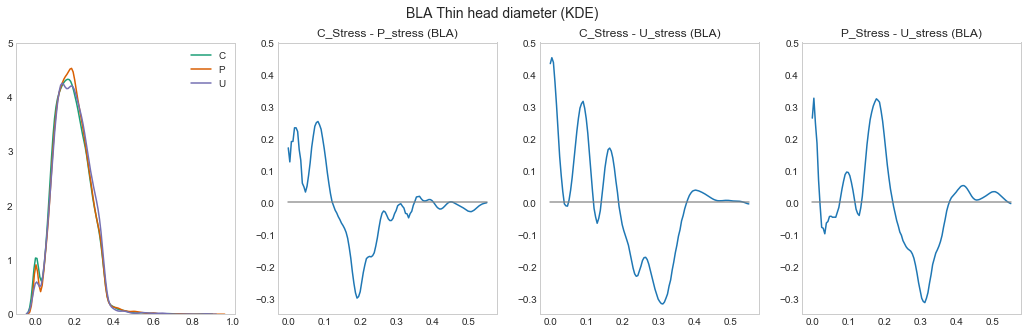

In [19]:
neg_color = (239/255,138/255,98/255)
pos_color = (103/255,169/255,207/255)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,4,1)
ax1.set_ylim([0,5])
fig.suptitle('BLA Thin head diameter (KDE)',fontsize=14)
sns.kdeplot(CStress_thin_BLA.head_diameter,color=C_color,label='C',ax=ax1,)
sns.kdeplot(PStress_thin_BLA.head_diameter,color=P_color,label='P',ax=ax1)
sns.kdeplot(UStress_thin_BLA.head_diameter,color=U_color,label='U',ax=ax1)

#get the x and y values from the plots
line = ax1.lines[0]
line2 = ax1.lines[1]
line3 = ax1.lines[2]
y1 = (line.get_ydata())
y2 = (line2.get_ydata())
y3 = (line3.get_ydata())
x1 = (line.get_xdata())
x2 = (line2.get_xdata())
x3 = (line3.get_xdata())

#set up an array of x values that cover the x-axis evenly 
x = np.linspace(0,0.55, num=128)
#get interpolated y values for each data set
y1_interp = np.interp(x,x1,y1)
y2_interp = np.interp(x,x2,y2)
y3_interp = np.interp(x,x3,y3)

y12_diff = y1_interp - y2_interp
ax2 = fig.add_subplot(1,4,2)
ax2.plot(x, y12_diff)
ax2.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax2.set_ylim([-0.35,0.5])
#ax2.fill_between(x,0,y12_diff, where= y12_diff<0,facecolor=neg_color, alpha=0.4)
#ax2.fill_between(x,0,y12_diff, where= y12_diff>0,facecolor=pos_color, alpha=0.4)
ax2.set_title('C_Stress - P_stress (BLA)')

y13_diff = y1_interp - y3_interp
ax3 = fig.add_subplot(1,4,3)
ax3.plot(x, y13_diff)
ax3.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax3.set_ylim([-0.35,0.5])
#ax3.fill_between(x,0,y13_diff, where= y13_diff<0,facecolor=neg_color, alpha=0.4)
#ax3.fill_between(x,0,y13_diff, where= y13_diff>0,facecolor=pos_color, alpha=0.4)
ax3.set_title('C_Stress - U_stress (BLA)')

y23_diff = y2_interp - y3_interp
ax4 = fig.add_subplot(1,4,4)
ax4.plot(x, y23_diff)
ax4.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax4.set_ylim([-0.35,0.5])
#ax4.fill_between(x,0,y23_diff, where= y23_diff<0,facecolor=neg_color, alpha=0.4)
#ax4.fill_between(x,0,y23_diff, where= y23_diff>0,facecolor=pos_color, alpha=0.4)
ax4.set_title('P_Stress - U_stress (BLA)')

plt.savefig('KDE-Diff_BLA_thin_hd.tiff',dpi=300)
plt.savefig('KDE-Diff_BLA_thin_hd.eps')


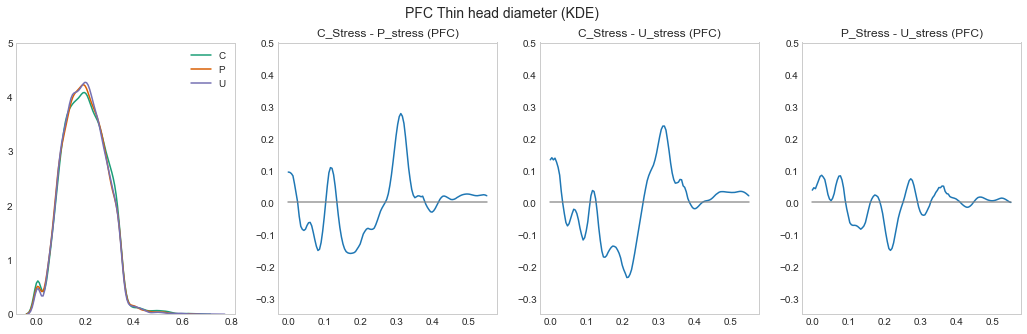

In [20]:
neg_color = (239/255,138/255,98/255)
pos_color = (103/255,169/255,207/255)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,4,1)
ax1.set_ylim([0,5])
fig.suptitle('PFC Thin head diameter (KDE)',fontsize=14)
sns.kdeplot(CStress_thin_PFC.head_diameter,color=C_color,label='C',ax=ax1,)
sns.kdeplot(PStress_thin_PFC.head_diameter,color=P_color,label='P',ax=ax1)
sns.kdeplot(UStress_thin_PFC.head_diameter,color=U_color,label='U',ax=ax1)

#get the x and y values from the plots
line = ax1.lines[0]
line2 = ax1.lines[1]
line3 = ax1.lines[2]
y1 = (line.get_ydata())
y2 = (line2.get_ydata())
y3 = (line3.get_ydata())
x1 = (line.get_xdata())
x2 = (line2.get_xdata())
x3 = (line3.get_xdata())

#set up an array of x values that cover the x-axis evenly 
x = np.linspace(0,0.55, num=128)
#get interpolated y values for each data set
y1_interp = np.interp(x,x1,y1)
y2_interp = np.interp(x,x2,y2)
y3_interp = np.interp(x,x3,y3)

y12_diff = y1_interp - y2_interp
ax2 = fig.add_subplot(1,4,2)
ax2.plot(x, y12_diff)
ax2.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax2.set_ylim([-0.35,0.5])
#ax2.fill_between(x,0,y12_diff, where= y12_diff<0,facecolor=neg_color, alpha=0.4)
#ax2.fill_between(x,0,y12_diff, where= y12_diff>0,facecolor=pos_color, alpha=0.4)
ax2.set_title('C_Stress - P_stress (PFC)')

y13_diff = y1_interp - y3_interp
ax3 = fig.add_subplot(1,4,3)
ax3.plot(x, y13_diff)
ax3.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax3.set_ylim([-0.35,0.5])
#ax3.fill_between(x,0,y13_diff, where= y13_diff<0,facecolor=neg_color, alpha=0.4)
#ax3.fill_between(x,0,y13_diff, where= y13_diff>0,facecolor=pos_color, alpha=0.4)
ax3.set_title('C_Stress - U_stress (PFC)')

y23_diff = y2_interp - y3_interp
ax4 = fig.add_subplot(1,4,4)
ax4.plot(x, y23_diff)
ax4.plot(x, [0]*len(x), color='gray', alpha=0.8)
ax4.set_ylim([-0.35,0.5])
#ax4.fill_between(x,0,y23_diff, where= y23_diff<0,facecolor=neg_color, alpha=0.4)
#ax4.fill_between(x,0,y23_diff, where= y23_diff>0,facecolor=pos_color, alpha=0.4)
ax4.set_title('P_Stress - U_stress (PFC)')

plt.savefig('KDE-Diff_PFC_thin_hd.tiff',dpi=300)
plt.savefig('KDE-Diff_PFC_thin_hd.eps')


## Minimum distance to nearest neighbor(s)

To look at one measure of clustering of spines, we can look at the distance of each spine to its closest neighboring spine (or closest 2 neighboring spines). Neuronstudio output files include X,Y,Z coordinates of center of mass for each spine. These coordinates will be used to get euclidean distances for each spine. Analysis has to be performed for each segment and min distance values for each spine will be compiled. 

In [8]:
def min_distances(data):
    """Return distance to closest neighboring spine for each spine.
    
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    
    segments = data.segment.unique()
    combined = pd.DataFrame()
    for filename in segments:
        df = data[data.segment == filename]
        length = df.section_length.unique().sum()
        spines = len(df)
        expected_distance = length/spines
        location = np.array(df.loc[:, ['X','Y','Z']])
        distances = pd.DataFrame(euclidean_distances(location,location))
        min_distances = distances[distances > 0].min(axis=1) / expected_distance
        frame = [combined,min_distances]
        combined = pd.concat(frame)
        
    return combined

def two_min_distances(data):
    """Return average distance to the two closest neighboring spines for each spine.
    
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    segments = data.segment.unique()
    combined = pd.DataFrame()
    for filename in segments:
        df = data[data.segment == filename]
        length = df.section_length.unique().sum()
        spines = len(df)
        expected_distance = length/spines
        location = np.array(df.loc[:, ['X','Y','Z']])
        distances = np.array(euclidean_distances(location,location))
        sorted_distances = np.sort(distances)
        min_distances = pd.DataFrame(sorted_distances[:,1:3]).mean(axis=1) / expected_distance
        frame = [combined,min_distances]
        combined = pd.concat(frame)
        
    return combined

In [9]:
C_BLA_min_thin = min_distances(CStress_thin_BLA)
P_BLA_min_thin = min_distances(PStress_thin_BLA)
U_BLA_min_thin = min_distances(UStress_thin_BLA)
C_PFC_min_thin = min_distances(CStress_thin_PFC)
P_PFC_min_thin = min_distances(PStress_thin_PFC)
U_PFC_min_thin = min_distances(UStress_thin_PFC)

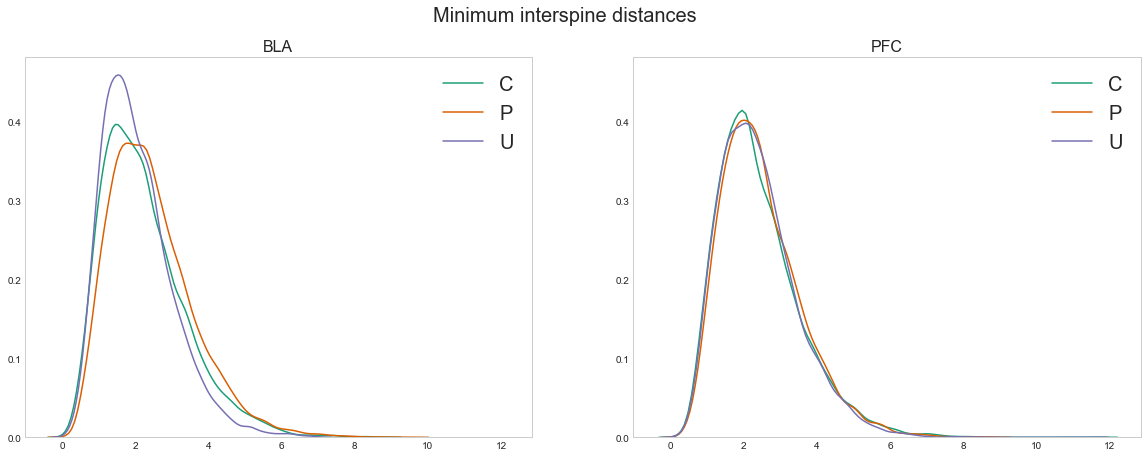

In [10]:
#plot distributions of min distances

fig = plt.figure(figsize=(20,7))
fig.suptitle('Minimum interspine distances',fontsize=20)
ax1 = fig.add_subplot(1,2,1)
sns.distplot(C_BLA_min_thin, label='C', hist=False, color=C_color)
sns.distplot(P_BLA_min_thin, label='P', hist=False, color=P_color)
sns.distplot(U_BLA_min_thin, label='U', hist=False, color=U_color)
#plt.axis([0,5.5,0,0.8])
plt.legend(fontsize=20)
plt.title('BLA',fontsize=16)


ax2 = fig.add_subplot(1,2,2,sharex=ax1, sharey=ax1)
sns.distplot(C_PFC_min_thin, label='C', hist=False, color=C_color)
sns.distplot(P_PFC_min_thin, label='P', hist=False, color=P_color)
sns.distplot(U_PFC_min_thin, label='U', hist=False, color=U_color)
plt.legend(fontsize=20)
plt.title('PFC',fontsize=16)

plt.savefig('Min_Interspine_Distance_BLA_and_PFC.tiff',dpi=300)
plt.savefig('Min_Interspine_Distance_BLA_and_PFC.eps')
plt.show()


## Additional clustering analysis
The above analysis only tells us how close the nearest neighbor is, but we don't know if that means spines are arranged in pairs or in larger clusters. Another way of looking at clustering is to use DBSCAN to see how many spines are in a cluster on average. Two values need to be defined: minimum number of spines in a cluster to be considered a cluster (in this example I chose 2, but 3 would work as well), and maximum distance(eps) between a spine and another spine to be considered part of the cluster. This value is difficult to choose. For this example I chose 1.79 micro meters, because that is the average (non-normalized) minimum distance for two of the groups.   

In [11]:
from collections import Counter
def cluster_size(data):
    """Return average number of spines in a cluster on each segment.
       
       data -- DataFrame with dendritic spine data from neuronstudio and added segment column that identifies 
               which segement the spine comes from."""
    
    segments = data.segment.unique()
    all_cluster_size = []
    for filename in segments:
        df = data[data.segment == filename]
        total_spines = len(df)    
        location = np.array(df.loc[:, ['X','Y','Z']])
        db = DBSCAN(eps=1.79, min_samples=2).fit(location)
        labels = db.labels_
        counted = Counter(labels)
        del counted[-1]
        if len(counted) > 0:
            cluster_size = np.mean(list(counted.values()))
            all_cluster_size.append(cluster_size)
        
    return all_cluster_size

In [12]:
CStress_thin_BLA_ClustSz = cluster_size(CStress_thin_BLA)
PStress_thin_BLA_ClustSz = cluster_size(PStress_thin_BLA)
UStress_thin_BLA_ClustSz = cluster_size(UStress_thin_BLA)

CStress_thin_PFC_ClustSz = cluster_size(CStress_thin_PFC)
PStress_thin_PFC_ClustSz = cluster_size(PStress_thin_PFC)
UStress_thin_PFC_ClustSz = cluster_size(UStress_thin_PFC)

In [13]:
print('BLA C_Stress mean +/- SEM cluster size: ', np.mean(CStress_thin_BLA_ClustSz), '+/-', stats.sem(CStress_thin_BLA_ClustSz))
print('BLA P_Stress mean +/- SEM cluster size: ', np.mean(PStress_thin_BLA_ClustSz), '+/-', stats.sem(PStress_thin_BLA_ClustSz))
print('BLA U_Stress mean +/- SEM cluster size: ', np.mean(UStress_thin_BLA_ClustSz), '+/-', stats.sem(UStress_thin_BLA_ClustSz))
print('')
print('PFC C_Stress mean +/- SEM cluster size: ', np.mean(CStress_thin_PFC_ClustSz), '+/-', stats.sem(CStress_thin_PFC_ClustSz))
print('PFC P_Stress mean +/- SEM cluster size: ', np.mean(PStress_thin_PFC_ClustSz), '+/-', stats.sem(PStress_thin_PFC_ClustSz))
print('PFC U_Stress mean +/- SEM cluster size: ', np.mean(UStress_thin_PFC_ClustSz), '+/-', stats.sem(UStress_thin_PFC_ClustSz))

BLA C_Stress mean +/- SEM cluster size:  5.4669211576908685 +/- 0.48331267182007476
BLA P_Stress mean +/- SEM cluster size:  5.2459913228519675 +/- 0.18954576282437402
BLA U_Stress mean +/- SEM cluster size:  4.093275817723467 +/- 0.14499839524513852

PFC C_Stress mean +/- SEM cluster size:  5.021280783468767 +/- 0.2766790064309123
PFC P_Stress mean +/- SEM cluster size:  5.847717978607191 +/- 0.2812895631709878
PFC U_Stress mean +/- SEM cluster size:  4.556591276885225 +/- 0.10755578859618696


In [14]:
print('BLA, C vs. P cluster sizes: ', stats.ks_2samp(CStress_thin_BLA_ClustSz, PStress_thin_BLA_ClustSz))
print('BLA, C vs. U cluster sizes: ', stats.ks_2samp(CStress_thin_BLA_ClustSz, UStress_thin_BLA_ClustSz))
print('BLA, P vs. U cluster sizes: ', stats.ks_2samp(PStress_thin_BLA_ClustSz, UStress_thin_BLA_ClustSz))
print('')
print('PFC, C vs. P cluster sizes: ', stats.ks_2samp(CStress_thin_PFC_ClustSz, PStress_thin_PFC_ClustSz))
print('PFC, C vs. U cluster sizes: ', stats.ks_2samp(CStress_thin_PFC_ClustSz, UStress_thin_PFC_ClustSz))
print('PFC, P vs. U cluster sizes: ', stats.ks_2samp(PStress_thin_PFC_ClustSz, UStress_thin_PFC_ClustSz))

BLA, C vs. P cluster sizes:  Ks_2sampResult(statistic=0.12798944416955305, pvalue=0.09284080946968545)
BLA, C vs. U cluster sizes:  Ks_2sampResult(statistic=0.1280894046851493, pvalue=0.27639578594575576)
BLA, P vs. U cluster sizes:  Ks_2sampResult(statistic=0.21822879962414843, pvalue=0.0017687970352323872)

PFC, C vs. P cluster sizes:  Ks_2sampResult(statistic=0.18002136752136755, pvalue=0.03317889716858245)
PFC, C vs. U cluster sizes:  Ks_2sampResult(statistic=0.08533653846153844, pvalue=0.6253322409765117)
PFC, P vs. U cluster sizes:  Ks_2sampResult(statistic=0.22710622710622713, pvalue=0.0010212875670241363)
